In [1]:
%load_ext watermark
%watermark

Last updated: 2022-02-09T01:53:47.826811-03:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.20.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.13.0-28-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



## Problema a resolver
- Crear un estimador k-means con un número de clusters igual al número de géneros.
- Entrenar el modelo y indicar el cluster asignado a cada película.

## Etapas
- Parte 1 : variable 'genero' como objetivo (label)
- Parte 2 : variable 'genero' como variable

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [4]:
from scipy import spatial
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure

In [5]:
# suprimir notacion cientifica
np.set_printoptions(suppress=True)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Parte 1 : variable 'genero' como objetivo (label)

In [7]:
#peliculas = pd.read_csv("../data/movies_1.csv")
peliculas = pd.read_csv("movies_1.csv")

In [8]:
peliculas.head(3)

,presupuesto,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
0,NaN,Comedy,en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
1,NaN,Drama,en,0.894647,Miramax,South Africa,676525.0,106.0,"Cry, the Beloved Country",6.7,13.0
2,3500000.0,Comedy,en,14.569650,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0


### Valores Nulos 

In [9]:
#peliculas.isnull().values
#peliculas.isnull().values.sum()
peliculas.isnull().sum()

presupuesto    588
genero          51
lenguaje         0
popularidad      0
productores    209
pais            98
ventas         141
duracion         8
titulo           0
puntuacion       0
n_votos          0
dtype: int64

 - El objetivo es agrupar la categoria 'genero' e identificar las peliculas en este cluster
   - se eliminaran los datos con valores NaN de la categoria 'genero'
 - Los valores NaN de las categorias 'presupuesto' y 'ventas' seran reemplazados con la mediana, ya que debido a su gran cantidad, el valor '0' distorsiona demasiado la variable. se evaluara la pertinencia de descartar estas variables.
 - Los valores NaN de las categorias 'productores' y 'pais' seran reeplazados con 'desconocido' 
 - Los valores NaN de la categoria 'duracion' seran reeplazados con el valor promedio. 

In [10]:
peliculas.dropna(subset=['genero'], inplace=True)
peliculas[['presupuesto', 'ventas']]=peliculas[['presupuesto', 'ventas']].fillna(peliculas[['presupuesto', 'ventas']].median())
peliculas[['productores', 'pais']]=peliculas[['productores', 'pais']].fillna('desconocido') # 
peliculas['duracion']=peliculas['duracion'].fillna(peliculas['duracion'].mean())

In [11]:
peliculas.isnull().sum()

presupuesto    0
genero         0
lenguaje       0
popularidad    0
productores    0
pais           0
ventas         0
duracion       0
titulo         0
puntuacion     0
n_votos        0
dtype: int64

## Estadisticas y Graficos

In [12]:
peliculas.describe()

,presupuesto,popularidad,ventas,duracion,puntuacion,n_votos
count,1.293000e+03,1293.000000,1.293000e+03,1293.000000,1293.000000,1293.000000
mean,1.493232e+07,6.048383,3.417025e+07,102.276827,6.100541,269.062645
std,1.675554e+07,5.268795,6.184230e+07,22.965708,1.353670,498.837694
min,1.000000e+00,0.000464,1.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+06,1.744200,1.162422e+06,91.000000,5.600000,17.000000
50%,1.090000e+07,5.495138,1.000000e+07,100.000000,6.300000,70.000000
75%,1.400000e+07,8.963037,3.643398e+07,113.000000,6.900000,279.000000
max,1.780000e+08,64.299990,6.118994e+08,223.000000,9.500000,4831.000000


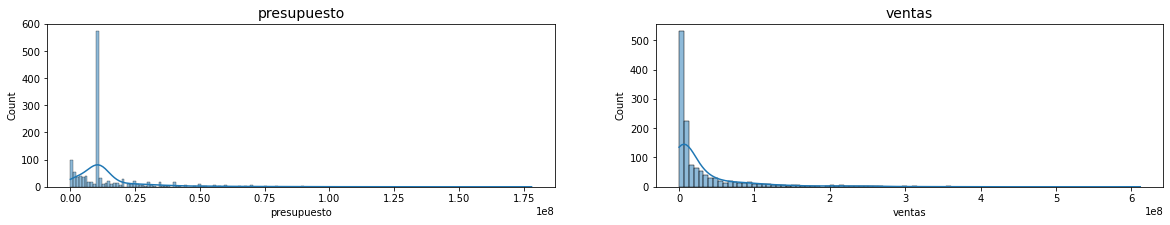

In [13]:
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
sns.histplot(data=peliculas, x='presupuesto', legend=True, kde=True)
plt.title('{}'.format('presupuesto'), size=14)
plt.subplot(1, 2, 2)
sns.histplot(data=peliculas, x='ventas', legend=True, kde=True)
plt.title('{}'.format('ventas'), size=14)
plt.show()

- La variable presupuesto contiene un 44% de valores NaN, los cuales ejercen demasiada influencia sobre la distribucion
- La variable ventas presenta valores aparentemente anomalos. Se infiere que se debe a la unidad de medidad, miles y/o millones de dolares mezclados.
- Estas variables seran descartadas

In [14]:
peliculas.drop('presupuesto', axis=1, inplace=True)
peliculas.drop('ventas', axis=1, inplace=True)

### MinMaxScaler & StandardScaler

In [15]:
peliculas_num_raw = peliculas.select_dtypes(['float64'])

In [16]:
# Escalar datos MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit_transform(peliculas_num_raw)
peliculas_num_MMS = pd.DataFrame(scaler, columns=peliculas_num_raw.columns, index=peliculas_num_raw.index)
# Estandarizar datos
scaler = StandardScaler()
scaler = scaler.fit_transform(peliculas_num_raw)
peliculas_num_StandScal = pd.DataFrame(scaler, columns=peliculas_num_raw.columns, index=peliculas_num_raw.index)

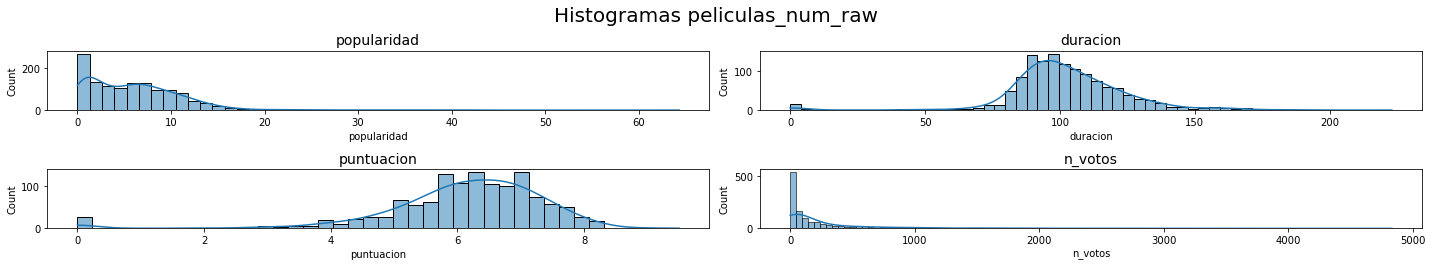

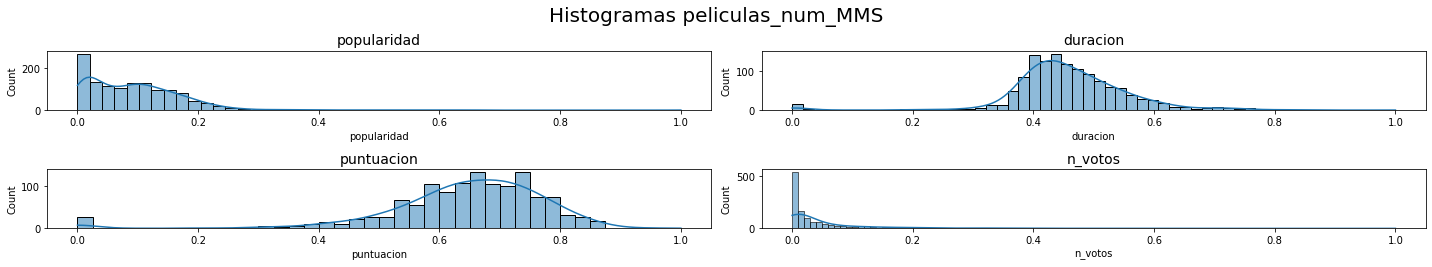

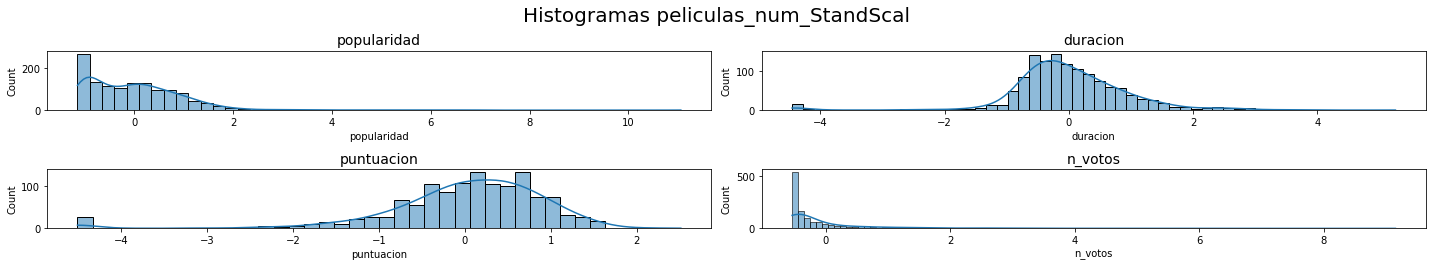

In [17]:
# Histogramas MinMaxScaler & StandardScaler
i=1
for dataScal in ['peliculas_num_raw', 'peliculas_num_MMS', 'peliculas_num_StandScal']:
    cols = eval(dataScal).columns
    plt.figure(figsize=(20, 10))
    plt.suptitle('Histogramas {}'.format(dataScal), size=20)
    for var in cols: 
        plt.subplot(6, 2, i)
        sns.histplot(data=eval(dataScal), x=var, legend=True, kde=True)
        plt.title('{}'.format(var), size=14)
        i+=1
        plt.tight_layout();
    plt.show()
    i=1

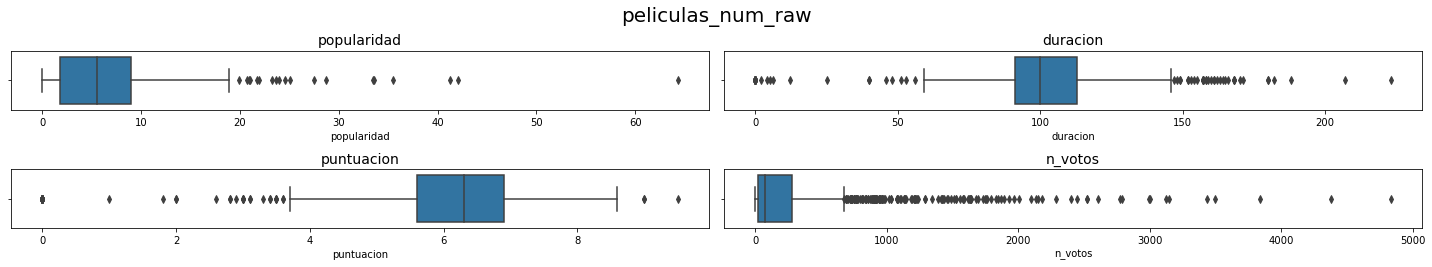

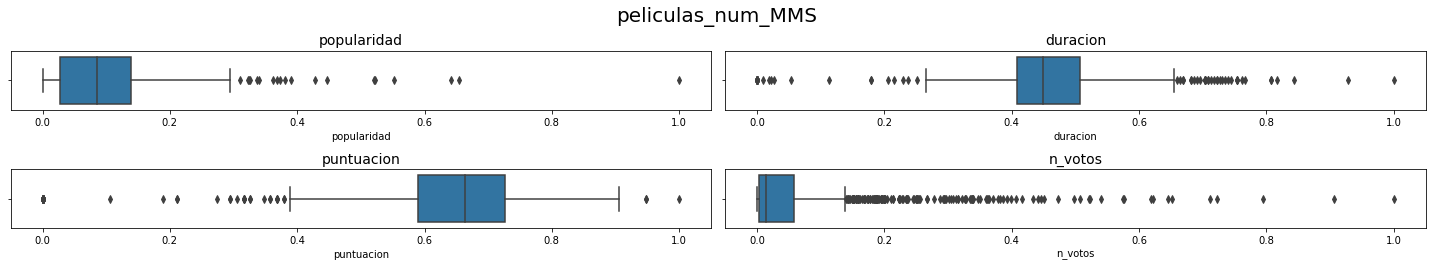

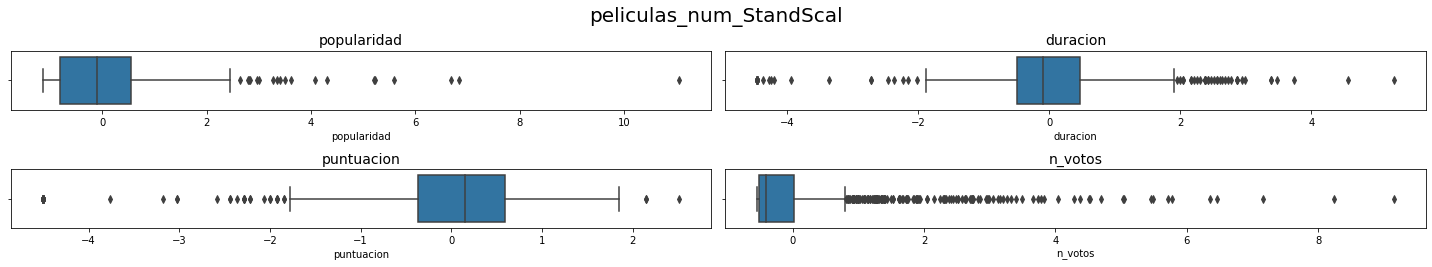

In [18]:
# Boxplot
i=1
for dataScal in ['peliculas_num_raw','peliculas_num_MMS', 'peliculas_num_StandScal']:
    plt.figure(figsize=(20, 10))
    plt.suptitle('{}'.format(dataScal), size=20)
    cols = eval(dataScal).columns
    for var in cols: 
        plt.subplot(6, 2, i);
        sns.boxplot(data=eval(dataScal), x=var)
        plt.title('{}'.format(var), size=14)
        i+=1
        plt.tight_layout();
    plt.show();
    i=1

- Existe influencia de valores cercanos a cero principalmente en la variables 'n_votos', tanto en la distribucion como en el analisis outliers en el grafico de boxplot
- En los siguientes analisis se usaran los datos escalados con MinMaxScaler

In [19]:
peliculas.n_votos.value_counts()

2.0      31
1.0      30
3.0      29
0.0      25
10.0     22
         ..
403.0     1
211.0     1
254.0     1
165.0     1
461.0     1
Name: n_votos, Length: 503, dtype: int64

## Variables Categoricas y Numericas

In [20]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1342
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genero       1293 non-null   object 
 1   lenguaje     1293 non-null   object 
 2   popularidad  1293 non-null   float64
 3   productores  1293 non-null   object 
 4   pais         1293 non-null   object 
 5   duracion     1293 non-null   float64
 6   titulo       1293 non-null   object 
 7   puntuacion   1293 non-null   float64
 8   n_votos      1293 non-null   float64
dtypes: float64(4), object(5)
memory usage: 101.0+ KB


In [21]:
# Variable objetivo 'genero'
peliculas.genero.value_counts()

Drama              485
Comedy             453
Documentary        127
Horror              75
Action              29
Thriller            26
Western             25
Science Fiction     20
Adventure           14
Animation           11
Romance             10
Music                6
Family               3
War                  3
Fantasy              2
Mystery              2
Crime                2
Name: genero, dtype: int64

In [22]:
#print(peliculas.genero.unique())
print('Numero generos de peliculas:', peliculas.genero.unique().shape[0])

Numero generos de peliculas: 17


In [23]:
# Label Encoding categoria 'genero'
peliculas['genero']=peliculas['genero'].astype('category').cat.codes
peliculas['genero']

0        3
1        6
2        3
3        3
4        3
        ..
1335    16
1336     0
1338     5
1339     9
1342     9
Name: genero, Length: 1293, dtype: int8

In [24]:
set(peliculas['genero'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [25]:
# Separar dataFrame por tipos de variables
peliculas_cat_gen = peliculas[['genero']]
#peliculas_num = #peliculas.drop('genero', axis=1).select_dtypes(['float64']) # definida anteriormente
peliculas_cat = peliculas.select_dtypes(['object'])

In [26]:
peliculas_cat.lenguaje.value_counts()[0:12]

en    1079
fr      53
es      26
it      22
ru      21
de      16
hi      14
ja      10
pt      10
ko       6
zh       6
sv       4
Name: lenguaje, dtype: int64

In [27]:
# obtener lenguajes representativos de mayor frecuencia
flt = np.where((peliculas_cat['lenguaje'].value_counts()>=10).values == True)[0]
f_leng = list((peliculas_cat['lenguaje'].value_counts()>=10)[flt].index)
f_leng

['en', 'fr', 'es', 'it', 'ru', 'de', 'hi', 'ja', 'pt']

In [28]:
# get_dummies para frecuencia de lenguaje
peliculas_cat_lenguaje=pd.get_dummies(peliculas_cat['lenguaje'])[f_leng]
peliculas_cat_lenguaje.head(2)

,en,fr,es,it,ru,de,hi,ja,pt
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


In [29]:
peliculas_clean = pd.concat([peliculas_num_MMS, peliculas_cat_lenguaje, peliculas_cat_gen], axis=1)
peliculas_clean.head(3)

,popularidad,duracion,puntuacion,n_votos,en,fr,es,it,ru,de,hi,ja,pt,genero
0,0.130437,0.475336,0.600000,0.035810,1,0,0,0,0,0,0,0,0,3
1,0.013907,0.475336,0.705263,0.002691,1,0,0,0,0,0,0,0,0,6
2,0.226583,0.408072,0.736842,0.106189,1,0,0,0,0,0,0,0,0,3


## Correlacion

In [30]:
corr=peliculas_clean.corr(method='spearman')

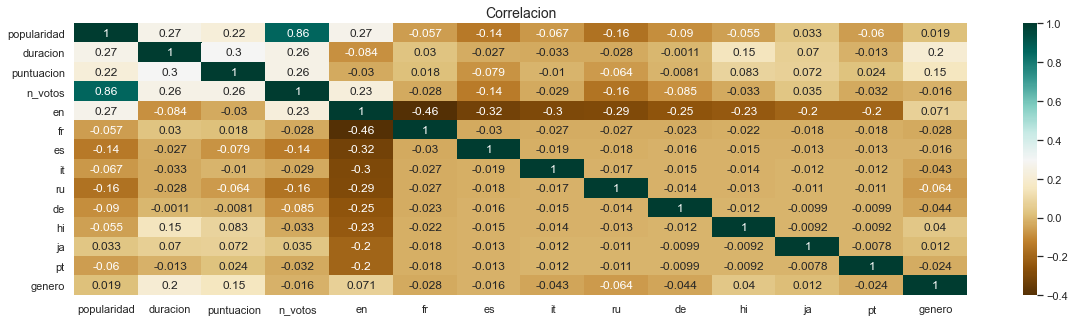

In [31]:
plt.figure(figsize=(20,5))
sns.set(font_scale=1)
plt.title('Correlacion', size=14);
#mask = np.tril(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap='BrBG', vmin=-0.4, vmax=1, mask=None);

In [32]:
# ordenar correlaciones de la variable objetivo
def tabla_corr(corr_data):
    corr_data = corr_data.stack().reset_index()
    corr_data.columns = ['var1','var2','r']
    corr_data = corr_data.loc[corr_data['var1'] != corr_data['var2'], :]
    corr_data['r_abs'] = np.abs(corr_data['r'])
    corr_data = corr_data.sort_values('r_abs', ascending=False)  
    return(corr_data)

In [33]:
# filtrar correlaciones de la variable objetivo
tablaCorr=tabla_corr(corr)
corrVal=tablaCorr[(tablaCorr['r_abs']>0) & (tablaCorr['var2']=='genero')].sort_values('r_abs', ascending=False)
corrVal.head()

,var1,var2,r,r_abs
27,duracion,genero,0.201701,0.201701
41,puntuacion,genero,0.152528,0.152528
69,en,genero,0.070557,0.070557
125,ru,genero,-0.064066,0.064066
139,de,genero,-0.043796,0.043796


- La correlacion de las variables con genero es baja
- El lenguaje de la pelicula no tiene gran influencia

# Estimador k-means

- La variable objetivo 'genero', sera extraida del estimador k-means #peliculas_clean.drop('genero', axis=1)

In [34]:
np.random.seed(42)

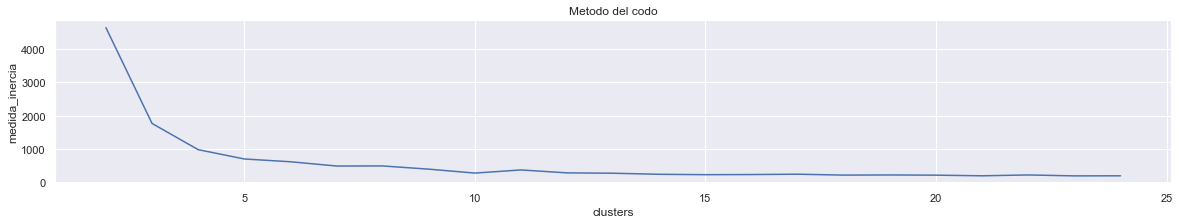

In [35]:
# Metodo del codo. Estimar numero de cluster
medida_inercia=[]
valores_k = np.arange(2, 25)
for vk in valores_k:
    estimador_kmeans = KMeans(n_clusters=vk, init = 'random')
    estimador_kmeans.fit(peliculas_clean)
    m_inercia = estimador_kmeans.inertia_
    medida_inercia.append(m_inercia)

plt.figure(figsize=(20,3))
plt.plot(valores_k, medida_inercia)
plt.title("Metodo del codo")
plt.xlabel('clusters')
plt.ylabel('medida_inercia');

- El metodo del codo nos indica que segun nuestros datos, se pueden separar de mejor forma entre 5 a 7 cluster, sin embargo, debido a que son 17 los generos de peliculas presentes, se usaran 17 clusters

In [36]:
#k-means con 17 cluster segun numero de generos en base de datos
k = peliculas_clean.genero.unique().shape[0] # numero de clusters
estimador_kmeans = KMeans(n_clusters=k,init = 'random')

In [37]:
# Estimador k-means. drop(genero)
estimador_kmeans.fit(peliculas_clean.drop('genero', axis=1))

KMeans(init='random', n_clusters=17)

In [38]:
label_clus=estimador_kmeans.labels_
label_clus

array([13, 14,  6, ..., 14,  5, 13], dtype=int32)

In [39]:
peliculas_clean['genero'].values

array([3, 6, 3, ..., 5, 9, 9], dtype=int8)

In [40]:
print(set(label_clus))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [41]:
centroides = estimador_kmeans.cluster_centers_
centroides.shape

(17, 13)

In [42]:
clus_predict = estimador_kmeans.predict(peliculas_clean.drop('genero', axis=1))
clus_predict

array([13, 14,  6, ..., 14,  5, 13], dtype=int32)

In [43]:
# chequeo label kmeans fit sean iguales a las predecidas por kmeans
set(label_clus==clus_predict)

{True}

### Encontrar el cluster que corresponde a cada genero

In [44]:
label_clus_df=pd.DataFrame(label_clus, columns=['label_clus'], index=peliculas_clean.index)

In [45]:
# Se agrega al dataframe el label de kmeans fit
peliculas_clean_kmeans=pd.concat([peliculas_clean, label_clus_df], axis=1)

In [46]:
peliculas_clean_kmeans.head(2)

,popularidad,duracion,puntuacion,n_votos,en,fr,es,it,ru,de,hi,ja,pt,genero,label_clus
0,0.130437,0.475336,0.600000,0.035810,1,0,0,0,0,0,0,0,0,3,13
1,0.013907,0.475336,0.705263,0.002691,1,0,0,0,0,0,0,0,0,6,14


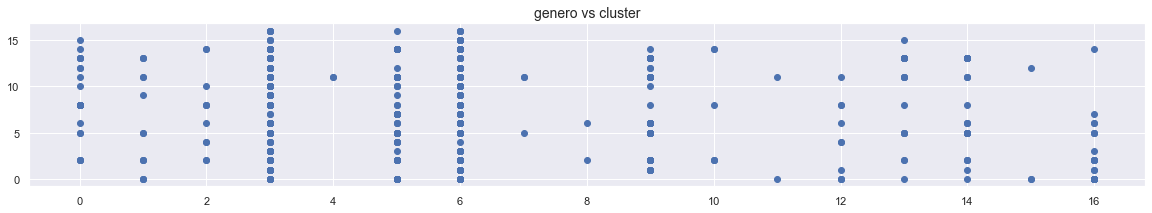

In [47]:
# grafico genero vs cluster
plt.figure(figsize=(20,3))
plt.title('genero vs cluster', size=14);
plt.scatter(peliculas_clean['genero'], label_clus);

- Se calcula el valor medio de todas las variables para una categoria de genero, luego se compara la similitud con cada uno de los centroides y se obtiene el valor maximo (maxima similitud)

In [48]:
def genero_cat_cos(df, categ):
    valor_medio=[]
    simil=[]
    for val in df.drop('genero', axis=1):
        var_genero=df[df['genero']==categ].drop('genero', axis=1)
        valor_medio.append(var_genero[val].mean())       
    for centro in centroides:
        #dist_cos y spat_cos es el mismo principio
        #dist_cos=np.dot(np.array(valor_medio), centro)/(np.linalg.norm(np.array(valor_medio))*np.linalg.norm(centro))
        spat_cos=1 - spatial.distance.cosine(np.array(valor_medio), centro)
        simil.append(spat_cos) 
    return simil

In [49]:
simil_cos=[]
for c in range(0,k):
    simil_cos.append(genero_cat_cos(peliculas_clean, c))

In [50]:
# con los datos de similitud, obtener el indice ('Kidx_') ordenado de mayor a menor. 
# Index corresponde a la clase genero
var_=pd.DataFrame(simil_cos)
ind_sort=[]
for i in range(0, len(simil_cos)):
    ind_sort.append(var_.iloc[i].argsort().values[::-1])
idx_=pd.DataFrame(ind_sort).add_prefix('Kidx_')

In [51]:
eval_kmeas=pd.concat([idx_,var_], axis=1)
eval_kmeas.head()

,Kidx_0,Kidx_1,Kidx_2,Kidx_3,Kidx_4,Kidx_5,Kidx_6,Kidx_7,Kidx_8,Kidx_9,Kidx_10,Kidx_11,Kidx_12,Kidx_13,Kidx_14,Kidx_15,Kidx_16,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,6,2,14,1,13,11,5,15,8,4,7,10,12,16,3,9,0.951049,0.921146,0.926030,0.502104,0.813220,0.867081,0.935517,0.671942,0.834831,0.491160,0.568729,0.904134,0.546852,0.909215,0.924422,0.860308,0.519700
1,0,2,13,11,6,14,5,1,4,15,7,8,9,10,16,3,12,0.996961,0.974376,0.996465,0.381337,0.925539,0.983254,0.992864,0.864391,0.607946,0.420874,0.411136,0.993155,0.371172,0.993478,0.988383,0.889477,0.394589
2,6,14,0,2,1,13,11,4,5,15,8,7,10,16,3,9,12,0.938165,0.924333,0.933395,0.441000,0.893031,0.881409,0.943376,0.684879,0.716993,0.423642,0.534767,0.916648,0.420090,0.919288,0.941303,0.860818,0.464088
3,6,0,2,13,14,11,1,5,4,15,7,8,10,16,3,12,9,0.996515,0.980965,0.996156,0.416312,0.935526,0.974264,0.996835,0.836332,0.630647,0.397759,0.456517,0.989753,0.398428,0.992030,0.991798,0.903734,0.419240
4,11,14,2,5,13,6,0,4,1,7,15,8,10,16,3,9,12,0.981364,0.956503,0.993655,0.339891,0.970067,0.988592,0.984260,0.872588,0.533335,0.329164,0.362365,0.997375,0.326625,0.987268,0.994879,0.852479,0.357296


In [52]:
eval_kmeas.sort_values(by=np.arange(0,16).tolist(), ascending=False, inplace=True)

In [53]:
eval_kmeas.head(2)

,Kidx_0,Kidx_1,Kidx_2,Kidx_3,Kidx_4,Kidx_5,Kidx_6,Kidx_7,Kidx_8,Kidx_9,Kidx_10,Kidx_11,Kidx_12,Kidx_13,Kidx_14,Kidx_15,Kidx_16,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
11,2,0,11,6,13,14,5,1,4,15,7,8,10,16,3,9,12,0.998106,0.970978,0.999221,0.381382,0.935265,0.985253,0.994370,0.862313,0.606410,0.372588,0.410444,0.996344,0.370499,0.994139,0.993175,0.880247,0.395873
16,2,0,6,13,11,14,5,1,4,15,7,8,10,3,16,9,12,0.997896,0.977461,0.998338,0.408145,0.931898,0.982751,0.996413,0.858973,0.607732,0.373511,0.411977,0.993770,0.371378,0.995758,0.990657,0.895829,0.396606


In [54]:
cluster_identificados_kmeans=[]
for i in range(0,k):
    cluster_identificados_kmeans.append([eval_kmeas.index[i],int(eval_kmeas.iloc[i,i])])

In [55]:
# index 0, genero database
# index 1, cluster kmeans
pd.DataFrame(cluster_identificados_kmeans).sort_values(by=0).T

,14,2,15,3,13,8,4,12,9,10,6,0,5,11,7,16,1
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,16,13,9,13,16,4,13,10,15,7,1,2,13,8,1,9,0


In [56]:
def genero_cat_jaccard(df, categ):
    indice_jaccard=[]
    for val in range(0,k):
        tabla_class=df[df['genero']==categ]
        tabla_kmeans=df[df['label_clus']==val]
        inter=np.intersect1d(tabla_class,tabla_kmeans).shape[0]
        union=np.union1d(tabla_class,tabla_kmeans).shape[0]
        indice_jaccard.append(inter/union)
    return categ,np.argmax(indice_jaccard)

In [57]:
clus_cos_jac=[]
for c in range(0,k):
    simil=[]
    clus_cos_jac.append(genero_cat_jaccard(peliculas_clean_kmeans,c))
print(clus_cos_jac)

[(0, 8), (1, 9), (2, 4), (3, 13), (4, 4), (5, 14), (6, 0), (7, 4), (8, 16), (9, 13), (10, 3), (11, 4), (12, 4), (13, 12), (14, 5), (15, 12), (16, 0)]


In [58]:
# Traer archivo original (2)
peliculas2 = pd.read_csv("movies_1.csv")
peliculas2[['presupuesto', 'ventas']]=peliculas2[['presupuesto', 'ventas']].fillna(peliculas2[['presupuesto', 'ventas']].median())
peliculas2[['productores', 'pais']]=peliculas2[['productores', 'pais']].fillna('desconocido') # 
peliculas2['duracion']=peliculas2['duracion'].fillna(peliculas2['duracion'].mean())
peliculas2['genero_cat']=peliculas2['genero'].astype('category').cat.codes

In [59]:
peliculas_eval=pd.concat([peliculas2, label_clus_df], axis=1)
peliculas_eval.sort_values(by='genero', inplace=True)
peliculas_eval["label_clus"] = pd.to_numeric(peliculas_eval["label_clus"],downcast='integer')

In [60]:
# genero cat 9 (horror), kmeans lo selecciono como 7 en metodo simil_cos y 13 en metodo jaccard
peliculas_eval[peliculas_eval['label_clus']==13].sample(3)
#peliculas_eval.dropna()

,presupuesto,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos,genero_cat,label_clus
551,60000000.0,Comedy,en,7.667874,DreamWorks SKG,United States of America,95673607.0,101.0,Norbit,5.0,434.0,3,13.0
721,49900000.0,Comedy,en,5.673750,Universal Pictures,United States of America,26121638.0,102.0,Your Highness,5.2,511.0,3,13.0
355,75000000.0,Comedy,en,9.409379,Columbia Pictures,United States of America,195745823.0,106.0,Anger Management,5.9,937.0,3,13.0


In [61]:
peliculas_eval[peliculas_eval['label_clus']==13].shape

(138, 13)

- El metodo no entrego buenos resultados de separacion, por lo que no se puede evaluar si los metodos de busqueda y comparacion de cluster dieron el resultado correcto.
- Esto era de esperarse por las caracteristicas de la base de datos (con 'genero' como objetivo), para agupar la informacion y deducir a que genero podria pertenecer

### Agrupar los valores 'nan' de la variable genero con el modelo entrenado

In [62]:
# read
peliculas3 = pd.read_csv("movies_1.csv")
# get_dummies para frecuencia de lenguaje antes definida. Antes de dejar solo los 'nan', para no afectar las columnas dummies
peliculas_cat_lenguaje3=pd.get_dummies(peliculas3['lenguaje'])[f_leng]
# null
peliculas3=peliculas3[peliculas3['genero'].isnull()]
peliculas3['duracion']=peliculas3['duracion'].fillna(peliculas3['duracion'].mean())
# drop
peliculas3.drop('genero', axis=1, inplace=True)
peliculas3.drop('presupuesto', axis=1, inplace=True)
peliculas3.drop('ventas', axis=1, inplace=True)
# Scaler
peliculas_num_raw3 = peliculas3.select_dtypes(['float64'])
scaler = MinMaxScaler()
scaler = scaler.fit_transform(peliculas_num_raw3)
peliculas_num_MMS3 = pd.DataFrame(scaler, columns=peliculas_num_raw3.columns, index=peliculas_num_raw3.index)
# concat & dropna
peliculas_clean3 = pd.concat([peliculas_num_MMS3, peliculas_cat_lenguaje3], axis=1)
peliculas_clean3.dropna(inplace=True)
# predict kmeans
clus_predict3 = estimador_kmeans.predict(peliculas_clean3)
clus_predict3_df=pd.DataFrame(clus_predict3, columns=['label_clus'],index=peliculas_clean3.index)
peliculas_kmeans3 = pd.concat([peliculas3, clus_predict3_df], axis=1)
peliculas_kmeans3.head(5)

,lenguaje,popularidad,productores,pais,duracion,titulo,puntuacion,n_votos,label_clus
294,en,0.218588,NaN,NaN,97.0,Jackpot,6.0,1.0,0
319,en,0.022347,NaN,NaN,80.0,Teddy Bears' Picnic,0.0,0.0,7
434,en,6.839460,BIM Distribuzione,United States of America,122.0,Fahrenheit 9/11,6.9,403.0,15
486,en,0.902846,NaN,United States of America,92.0,Death of a Dynasty,4.0,2.0,13
629,en,0.004706,NaN,NaN,87.0,Praying With Lior,0.0,0.0,7


- se podrian reemplazar los cluster con el genero de pelicula, pero debido la confusa separacion de cluster obtenida, no se realizara.

# Parte 2 : Variable 'genero' como variable.

In [63]:
# read
peliculas4 = pd.read_csv("movies_1.csv")

In [64]:
# null
peliculas4['duracion']=peliculas4['duracion'].fillna(peliculas4['duracion'].mean())
peliculas4.dropna(subset=['genero'], inplace=True)
# drop
peliculas4.drop('presupuesto', axis=1, inplace=True) # +40% valores cero
peliculas4.drop('ventas', axis=1, inplace=True) # datos inconsistentes
peliculas4.drop(['productores', 'pais'], axis=1, inplace=True)

In [65]:
peliculas4.isnull().sum()

genero         0
lenguaje       0
popularidad    0
duracion       0
titulo         0
puntuacion     0
n_votos        0
dtype: int64

In [66]:
flt = np.where((peliculas4['genero'].value_counts()>=10).values == True)[0]
f_gen = list((peliculas4['genero'].value_counts()>=10)[flt].index)

In [67]:
# get_dummies 
peliculas_cat_lenguaje4=pd.get_dummies(peliculas4['lenguaje'])[f_leng]
peliculas_cat_genero4=pd.get_dummies(peliculas4['genero'])[f_gen]
peliculas_dummies4 = pd.concat([peliculas_cat_genero4, peliculas_cat_lenguaje4], axis=1)
peliculas_dummies4.head(3)

,Drama,Comedy,Documentary,Horror,Action,Thriller,Western,Science Fiction,Adventure,Animation,Romance,en,fr,es,it,ru,de,hi,ja,pt
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [68]:
# Scaler
peliculas_num_raw4 = peliculas4.select_dtypes(['float64'])
scaler = MinMaxScaler()
scaler = scaler.fit_transform(peliculas_num_raw4)
peliculas_num_MMS4 = pd.DataFrame(scaler, columns=peliculas_num_raw4.columns, index=peliculas_num_raw4.index)
# concat & dropna
peliculas_clean4 = pd.concat([peliculas_num_MMS4, peliculas_dummies4], axis=1)
peliculas_clean4.dropna(inplace=True)
peliculas_clean4.head(3)

,popularidad,duracion,puntuacion,n_votos,Drama,Comedy,Documentary,Horror,Action,Thriller,Western,Science Fiction,Adventure,Animation,Romance,en,fr,es,it,ru,de,hi,ja,pt
0,0.130437,0.475336,0.600000,0.035810,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.013907,0.475336,0.705263,0.002691,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.226583,0.408072,0.736842,0.106189,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [69]:
#k-means con 17 cluster segun numero de generos en base de datos
k = peliculas_clean.genero.unique().shape[0] # numero de clusters
estimador_kmeans4 = KMeans(n_clusters=k,init = 'random')
# Estimador k-means. 
estimador_kmeans4.fit(peliculas_clean4)
label_clus4=estimador_kmeans4.labels_
label_clus4

array([ 7,  2,  7, ..., 12,  4,  4], dtype=int32)

In [70]:
# fit kmeans
clus_predict4 = estimador_kmeans4.predict(peliculas_clean4)
clus_predict4_df=pd.DataFrame(clus_predict4, columns=['label_clus'],index=peliculas_clean4.index)
# filtrar peliculas4 con el index de peliculas_clean4
peliculas4b=peliculas4.loc[peliculas_clean4.index]
# concat
peliculas_kmeans4 = pd.concat([peliculas4b, clus_predict4_df], axis=1)
peliculas_kmeans4.head(3)

,genero,lenguaje,popularidad,duracion,titulo,puntuacion,n_votos,label_clus
0,Comedy,en,8.387519,106.0,Father of the Bride Part II,5.7,173.0,7
1,Drama,en,0.894647,106.0,"Cry, the Beloved Country",6.7,13.0,2
2,Comedy,en,14.569650,91.0,Friday,7.0,513.0,7


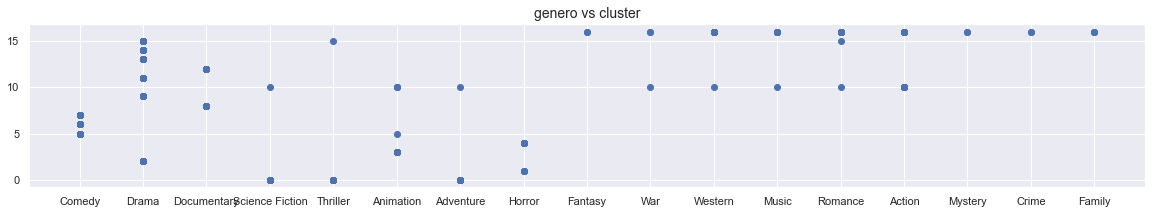

In [71]:
# grafico genero vs cluster
plt.figure(figsize=(20,3))
plt.title('genero vs cluster', size=14);
plt.scatter(peliculas4['genero'], label_clus4);

- Resultado bastante mas ordenado y decidor que en la etapa anterior
- Al eliminar la variable genero en la etapa 1, el algoritmo no fue capaz de agrupar los datos

# Asociar cluster kmeans con genero pelicula

## Jaccard

In [72]:
peliculas4c = pd.read_csv("movies_1.csv")
peliculas_kmeans4a = pd.concat([peliculas4c['genero'],peliculas_clean4, clus_predict4_df], axis=1)
peliculas_kmeans4a.dropna(inplace=True)
peliculas_kmeans4a.head(3)

,genero,popularidad,duracion,puntuacion,n_votos,Drama,Comedy,Documentary,Horror,Action,Thriller,Western,Science Fiction,Adventure,Animation,Romance,en,fr,es,it,ru,de,hi,ja,pt,label_clus
0,Comedy,0.130437,0.475336,0.600000,0.035810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,Drama,0.013907,0.475336,0.705263,0.002691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,Comedy,0.226583,0.408072,0.736842,0.106189,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [73]:
def genero_cat_jaccard(df, categ):
    indice_jaccard=[]
    for val in range(0,k):
        tabla_class=df[df['genero'].astype('category').cat.codes==categ]
        tabla_class.drop('genero', axis=1, inplace=True)
        tabla_kmeans=df[df['label_clus']==val]
        tabla_kmeans.drop('genero', axis=1, inplace=True)
        inter=np.intersect1d(tabla_class,tabla_kmeans).shape[0]
        union=np.union1d(tabla_class,tabla_kmeans).shape[0]
        indice_jaccard.append(inter/union)
    return categ,np.argmax(indice_jaccard)

In [74]:
clus_cos_jac=[]
for c in range(0,k):
    simil=[]
    clus_cos_jac.append(genero_cat_jaccard(peliculas_kmeans4a,c))
print(clus_cos_jac)

[(0, 10), (1, 0), (2, 3), (3, 7), (4, 1), (5, 12), (6, 2), (7, 1), (8, 3), (9, 4), (10, 8), (11, 1), (12, 15), (13, 0), (14, 0), (15, 10), (16, 16)]


In [75]:
clus_cos_jac_gen=[]
for j in range(len(clus_cos_jac)):
    val=peliculas_kmeans4a['genero'][peliculas_kmeans4a['genero'].astype('category').cat.codes==clus_cos_jac[j][0]].unique().tolist()[0]
    clus_cos_jac_gen.append([val, clus_cos_jac[j][1]])
    
pd.DataFrame(clus_cos_jac_gen).sort_values(by=1, ascending=True)

,0,1
1,Adventure,0
14,Thriller,0
13,Science Fiction,0
4,Crime,1
7,Family,1
11,Mystery,1
6,Drama,2
8,Fantasy,3
2,Animation,3
9,Horror,4


## Metodo de frecuencia

In [76]:
# seleccionar los generos de peliculas segusn label_clus
genero_search=[]
for g in range(k):
    filter_gen = peliculas_kmeans4[peliculas_kmeans4['label_clus'] == g]['genero']
    genero_search.append(filter_gen)
    
# determinar la moda para asociar genero al cluster
genero_asociado={}
for g in range(k):
    genero_asociado[g]=genero_search[g].mode()[0]

In [77]:
# cluster kmeans y genero asociado
genero_asociado

{0: 'Thriller',
 1: 'Horror',
 2: 'Drama',
 3: 'Animation',
 4: 'Horror',
 5: 'Comedy',
 6: 'Comedy',
 7: 'Comedy',
 8: 'Documentary',
 9: 'Drama',
 10: 'Action',
 11: 'Drama',
 12: 'Documentary',
 13: 'Drama',
 14: 'Drama',
 15: 'Drama',
 16: 'Western'}

In [78]:
set(genero_asociado.values())

{'Action',
 'Animation',
 'Comedy',
 'Documentary',
 'Drama',
 'Horror',
 'Thriller',
 'Western'}

- En ambos metodos se repiten los generos para ciertos clusters
- El indicador jaccard entrega 11 generos diferentes, mientras que el metodo de busqueda por frecuencia entrega 8 generos diferente.
- Si comparamos con la informacion de cluster capaz de separar por kmeans segun el metodo del codo, esta se asemeja a la obtenida por frecuencias.

## Medidas de evaluacion kmeans

In [79]:
silhouette_score(peliculas_clean4,label_clus4)

0.5435128607907154

In [80]:
clases_reales=peliculas_kmeans4a['genero'].astype('category').cat.codes.tolist()
homogeneity_completeness_v_measure(clases_reales, label_clus4)

(0.89981013007543, 0.6646800007285821, 0.7645759933388115)

## Prediccion sobre valores genero 'NaN'

In [81]:
# read
peliculas5 = pd.read_csv("movies_1.csv")
# null
peliculas5['duracion']=peliculas5['duracion'].fillna(peliculas5['duracion'].mean())
# drop
peliculas5.drop('presupuesto', axis=1, inplace=True) # +50% valores cero
peliculas5.drop('ventas', axis=1, inplace=True) # datos inconsistentes
peliculas5.drop(['productores', 'pais'], axis=1, inplace=True)
# get_dummies 
peliculas_cat_lenguaje5=pd.get_dummies(peliculas5['lenguaje'])[f_leng]
peliculas_cat_genero5=pd.get_dummies(peliculas5['genero'])[f_gen]
peliculas_dummies5 = pd.concat([peliculas_cat_genero5, peliculas_cat_lenguaje5], axis=1)
peliculas5=peliculas5[peliculas5['genero'].isnull()]
# Scaler
peliculas_num_raw5 = peliculas5.select_dtypes(['float64'])
scaler = MinMaxScaler()
scaler = scaler.fit_transform(peliculas_num_raw5)
peliculas_num_MMS5 = pd.DataFrame(scaler, columns=peliculas_num_raw5.columns, index=peliculas_num_raw5.index)
# concat & dropna
peliculas_clean5 = pd.concat([peliculas_num_MMS5, peliculas_dummies5], axis=1)
peliculas_clean5.dropna(inplace=True)
# predict kmeans
clus_predict5 = estimador_kmeans4.predict(peliculas_clean5)
clus_predict5_df=pd.DataFrame(clus_predict5, columns=['label_clus'],index=peliculas_clean5.index)

In [82]:
for r in range(len(clus_predict5_df)):
    clus_predict5_df['label_clus'].iloc[r]=genero_asociado[clus_predict5_df['label_clus'].iloc[r]]

In [83]:
# read again 
peliculas5a = pd.read_csv("movies_1.csv")
peliculas5b=peliculas5a.loc[peliculas_clean5.index]
peliculas_kmeans5 = pd.concat([peliculas5b, clus_predict5_df], axis=1)

In [84]:
# display 
peliculas_kmeans5.sample(5)

,presupuesto,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos,label_clus
1263,NaN,NaN,en,0.110204,NaN,NaN,NaN,14.0,It's a Bird,8.0,2.0,Western
1187,2500000.0,NaN,ru,0.209434,NaN,Russia,1477030.0,0.0,Glukhar v kino,5.9,4.0,Action
1266,NaN,NaN,de,0.038520,Pallas Film,Germany,NaN,85.0,Ferryman Maria,7.0,1.0,Action
1333,NaN,NaN,en,0.452939,Fennada-Film,Finland,NaN,96.0,"Vodka, Mr. Palmu",0.0,0.0,Western
1061,200000.0,NaN,en,0.560685,NaN,Russia,486937.0,100.0,Rita's Last Fairy Tale,7.4,8.0,Western
